<a href="https://colab.research.google.com/github/FelipPalermo/BatchFile_Editor/blob/main/GDP_Mundial_PIB_Mercosul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importações das Bibliotecas

In [ ]:
#Importar Pandas
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

In [ ]:
#Importar Pandera
!pip install pandera
import pandera as pa
pd.set_option('display.max_columns',100)
from pandera.checks import Check
from pandera.engines.numpy_engine import String
from pandera.dtypes import DateTime

In [ ]:
# Importar Google Cloud Storage File System
!pip install gcsfs 
from google.cloud import storage
import os

##Importando o Drive - Chave de Segurança - Acesso ao Bucket

In [ ]:
#Importar o drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Configurar a Chave de Segurança
serviceAccount = '/content/lunar-reef-355417-ecfe16be5ae7.json' 
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
#Códigos de acesso da Bucket para criar o Dataframe
#Criar uma variável para receber o nome da Bucket

client = storage.Client() 

#Colocar o nome da Bucket que foi criado no CloudStorage
bucket = client.get_bucket('bucket_e8_pf') 

#Escolher o arquivo dentro da Bucket
bucket.blob ('GDP_Mundial.csv')

#Criar uma variável que vai receber o caminho do arquivo
path = 'gs://bucket_e8_pf/GDP_Mundial.csv'

In [ ]:
df = pd.read_csv('gs://bucket_e8_pf/GDP_Mundial.csv',sep=',')
df.head(10)

##Traduzindo o arquivo do Inglês para o Português(BR)

In [ ]:
#Visualizar o índice das colunas em Inglês
df.head(1)

,Unnamed: 0,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0,"Afghanistan, Rep. of.",0,0,0,4.084,4.585,5.971,7.309,8.399,9.892,11.513,13.318,15.406,19.248,21.555,24.304,0,0,0,0,0,0,0,0


In [ ]:
#Renomeando o índice das colunas do DF do Inglês para o Português(BR)
df.rename(columns={
    'Unnamed: 0':'ID',
    'Country': 'Pais'                                                 
    },inplace=True)

In [ ]:
#Visualizar o índice das colunas traduzido para o Português(BR)
df.head(1)

,ID,Pais,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0,"Afghanistan, Rep. of.",0,0,0,4.084,4.585,5.971,7.309,8.399,9.892,11.513,13.318,15.406,19.248,21.555,24.304,0,0,0,0,0,0,0,0


In [ ]:
#Verificando os dados que constam na coluna especificada para tradução
pd.unique(df['Pais'])

array(['Afghanistan, Rep. of.', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Democratic Republic of', 'Congo, Republic of',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
     

In [ ]:
#Substituindo os dados da coluna 'País' do Inglês para o Português(BR) - Somente os Países do Mercosul (Brasil, Paraguai, Uruguai) - Venezuela, Bolivia e Argentina não precisam de tradução
df.replace('Brazil', 'Brasil', inplace = True)
df.replace('Paraguay', 'Paraguai', inplace = True)
df.replace('Uruguay', 'Uruguai', inplace = True)

In [ ]:
#Verificando a substituição dos dados 
pd.unique(df['Pais'])

array(['Afghanistan, Rep. of.', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brasil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Democratic Republic of', 'Congo, Republic of',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
     

##Verificando Inconsistências

In [ ]:
df

,ID,Pais,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0,"Afghanistan, Rep. of.",0,0,0,4.084,4.585,5.971,7.309,8.399,9.892,11.513,13.318,15.406,19.248,21.555,24.304,0,0,0,0,0,0,0,0
1,1,Albania,3.444,3.695,4.096,4.456,5.6,7.452,8.376,9.133,10.163,11.131,11.726,11.797,13.808,14.91,16.053,11.591,12.204,13.214,14.341,15.553,16.996,16.77,18.012
2,2,Algeria,48.845,54.749,55.181,57.053,68.013,85.016,102.38,114.322,116.158,126.889,134.797,154.843,177.83,190.432,203.449,175.077,181.71,192.256,202.179,210.906,219.16,163.812,168.195
3,3,Angola,6.153,9.135,8.936,11.386,13.956,19.8,30.632,43.759,55.37,67.608,69.708,87.718,118.426,136.415,151.089,102.011,98.815,105.369,112.533,119.403,127.15,70.339,74.953
4,4,Antigua and Barbuda,0.652,0.678,0.71,0.718,0.754,0.818,0.875,0.962,1.026,1.074,1.18,1.196,1.322,1.404,1.494,1.285,1.328,1.386,1.458,1.536,1.617,1.405,1.534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,Venezuela,97.977,117.153,122.872,92.889,83.442,112.8,143.443,181.608,219.372,231.959,353.469,379.16,394.106,403.123,409.562,131.855,133.534,144.227,155.096,170.41,184.364,44.893,43.546
176,176,Vietnam,28.684,31.196,32.504,35.148,39.63,45.548,53.053,60.995,68.298,76.414,91.764,102.906,123.505,135.729,148.914,198.805,214.75,229.845,247.415,265.987,287.257,368.002,415.493
177,177,"Yemen, Republic of",7.53,9.561,9.533,9.985,11.869,13.565,15.193,18.7,21.657,24.504,26.236,31.98,37.153,40.003,42.687,0,0,0,0,0,0,0,0
178,178,Zambia,3.132,3.238,3.64,3.775,4.326,5.44,7.271,10.942,10.104,10.519,12.293,15.792,20.208,21.829,23.613,24.466,25.158,27.17,29.911,32.957,36.316,21.699,23.967


In [ ]:
df.dtypes

ID       int64
Pais    object
1999    object
2000    object
2001    object
2002    object
2003    object
2004    object
2005    object
2006    object
2007    object
2008    object
2009    object
2010    object
2012    object
2013    object
2014    object
2015    object
2016    object
2017    object
2018    object
2019    object
2020    object
2021    object
2022    object
dtype: object

In [ ]:
df.isna().sum()

ID      0
Pais    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
dtype: int64

In [ ]:
#Verificando os valores que esta coluna possui
pd.unique(df['Pais'])

array(['Afghanistan, Rep. of.', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brasil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Democratic Republic of', 'Congo, Republic of',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
     

##Validação de Dados

In [ ]:
df.dtypes

ID       int64
Pais    object
1999    object
2000    object
2001    object
2002    object
2003    object
2004    object
2005    object
2006    object
2007    object
2008    object
2009    object
2010    object
2012    object
2013    object
2014    object
2015    object
2016    object
2017    object
2018    object
2019    object
2020    object
2021    object
2022    object
dtype: object

In [ ]:
for coluna in df :
  if coluna != "ID" and coluna != "Pais" :
    
    df[coluna] = df[coluna].astype(str).str.replace(',', '.')
    df[coluna] = df[coluna].astype(str).str.replace('.', '')
    df[coluna] = df[coluna].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


In [ ]:
#criando o Schema de dados para validação antes da limpeza de Dados
schema = pa.DataFrameSchema(
    columns = {
    'ID':pa.Column(pa.Int),
    '1999':pa.Column(pa.Float64),
    '2000':pa.Column(pa.Float),
    '2001':pa.Column(pa.Float),
    '2002':pa.Column(pa.Float),
    '2003':pa.Column(pa.Float),
    '2004':pa.Column(pa.Float),
    '2005':pa.Column(pa.Float),
    '2006':pa.Column(pa.Float),
    '2007':pa.Column(pa.Float),
    '2008':pa.Column(pa.Float),
    '2009':pa.Column(pa.Float),
    '2010':pa.Column(pa.Float),
    '2012':pa.Column(pa.Float),
    '2013':pa.Column(pa.Float),
    '2014':pa.Column(pa.Float),
    '2015':pa.Column(pa.Float),
    '2016':pa.Column(pa.Float),
    '2017':pa.Column(pa.Float),
    '2018':pa.Column(pa.Float),
    '2019':pa.Column(pa.Float),
    '2020':pa.Column(pa.Float),
    '2021':pa.Column(pa.Float),
    '2022':pa.Column(pa.Float),
    #'Renda':pa.Column(pa.Float, nullable=True),        
    }
)

In [ ]:
#Validador do Dataframe baseado no Schema
schema.validate(df)

,ID,Pais,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0,"Afghanistan, Rep. of.",0.0,0.0,0.0,4084.0,4585.0,5971.0,7309.0,8399.0,9892.0,11513.0,13318.0,15406.0,19248.0,21555.0,24304.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Albania,3444.0,3695.0,4096.0,4456.0,56.0,7452.0,8376.0,9133.0,10163.0,11131.0,11726.0,11797.0,13808.0,1491.0,16053.0,11591.0,12204.0,13214.0,14341.0,15553.0,16996.0,1677.0,18012.0
2,2,Algeria,48845.0,54749.0,55181.0,57053.0,68013.0,85016.0,10238.0,114322.0,116158.0,126889.0,134797.0,154843.0,17783.0,190432.0,203449.0,175077.0,18171.0,192256.0,202179.0,210906.0,21916.0,163812.0,168195.0
3,3,Angola,6153.0,9135.0,8936.0,11386.0,13956.0,198.0,30632.0,43759.0,5537.0,67608.0,69708.0,87718.0,118426.0,136415.0,151089.0,102011.0,98815.0,105369.0,112533.0,119403.0,12715.0,70339.0,74953.0
4,4,Antigua and Barbuda,652.0,678.0,71.0,718.0,754.0,818.0,875.0,962.0,1026.0,1074.0,118.0,1196.0,1322.0,1404.0,1494.0,1285.0,1328.0,1386.0,1458.0,1536.0,1617.0,1405.0,1534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,Venezuela,97977.0,117153.0,122872.0,92889.0,83442.0,1128.0,143443.0,181608.0,219372.0,231959.0,353469.0,37916.0,394106.0,403123.0,409562.0,131855.0,133534.0,144227.0,155096.0,17041.0,184364.0,44893.0,43546.0
176,176,Vietnam,28684.0,31196.0,32504.0,35148.0,3963.0,45548.0,53053.0,60995.0,68298.0,76414.0,91764.0,102906.0,123505.0,135729.0,148914.0,198805.0,21475.0,229845.0,247415.0,265987.0,287257.0,368002.0,415493.0
177,177,"Yemen, Republic of",753.0,9561.0,9533.0,9985.0,11869.0,13565.0,15193.0,187.0,21657.0,24504.0,26236.0,3198.0,37153.0,40003.0,42687.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178,178,Zambia,3132.0,3238.0,364.0,3775.0,4326.0,544.0,7271.0,10942.0,10104.0,10519.0,12293.0,15792.0,20208.0,21829.0,23613.0,24466.0,25158.0,2717.0,29911.0,32957.0,36316.0,21699.0,23967.0


No validador, foi obervado a ausência dos dados do ano de 2011

In [ ]:
df.dtypes

ID        int64
Pais     object
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
2022    float64
dtype: object

##Limpeza dos Dados

In [ ]:
#Backup antes da limpeza dos dados
df1 = df.copy()

In [ ]:
df1.head()

,ID,Pais,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0,"Afghanistan, Rep. of.",0.0,0.0,0.0,4084.0,4585.0,5971.0,7309.0,8399.0,9892.0,11513.0,13318.0,15406.0,19248.0,21555.0,24304.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Albania,3444.0,3695.0,4096.0,4456.0,56.0,7452.0,8376.0,9133.0,10163.0,11131.0,11726.0,11797.0,13808.0,1491.0,16053.0,11591.0,12204.0,13214.0,14341.0,15553.0,16996.0,1677.0,18012.0
2,2,Algeria,48845.0,54749.0,55181.0,57053.0,68013.0,85016.0,10238.0,114322.0,116158.0,126889.0,134797.0,154843.0,17783.0,190432.0,203449.0,175077.0,18171.0,192256.0,202179.0,210906.0,21916.0,163812.0,168195.0
3,3,Angola,6153.0,9135.0,8936.0,11386.0,13956.0,198.0,30632.0,43759.0,5537.0,67608.0,69708.0,87718.0,118426.0,136415.0,151089.0,102011.0,98815.0,105369.0,112533.0,119403.0,12715.0,70339.0,74953.0
4,4,Antigua and Barbuda,652.0,678.0,71.0,718.0,754.0,818.0,875.0,962.0,1026.0,1074.0,118.0,1196.0,1322.0,1404.0,1494.0,1285.0,1328.0,1386.0,1458.0,1536.0,1617.0,1405.0,1534.0


In [ ]:
#Filtrando os Países que não são Mercosul
df1 = df1.loc[(df1["Pais"] == "Brasil") | (df1["Pais"] == "Argentina") | (df1["Pais"] == "Bolivia") | (df1["Pais"] == "Paraguai") | (df1["Pais"] == "Uruguai") | (df1["Pais"] == "Venezuela") ]

In [ ]:
df1

,ID,Pais,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
5,5,Argentina,283523.0,284204.0,268697.0,97732.0,127643.0,151958.0,181549.0,212702.0,247096.0,277912.0,301331.0,296109.0,315832.0,329332.0,347731.0,578705.0,578692.0,589585.0,602868.0,617386.0,633889.0,455172.0,483765.0
19,19,Bolivia,8298.0,8412.0,8154.0,7917.0,8102.0,8749.0,9358.0,10828.0,1191.0,13194.0,17549.0,18961.0,21809.0,23306.0,24925.0,33537.0,35231.0,38204.0,41429.0,44903.0,48626.0,38547.0,40895.0
22,22,Brasil,586922.0,644283.0,55441.0,505712.0,552239.0,663552.0,882043.0,106771.0,117771.0,125163.0,148155.0,172435.0,192429.0,203624.0,215568.0,179961.0,167290.0,175927.0,185468.0,195367.0,205441.0,164584.0,181061.0
124,124,Paraguai,7301.0,7095.0,6446.0,5091.0,5552.0,695.0,7473.0,8773.0,9206.0,9735.0,13611.0,14284.0,15939.0,17257.0,18788.0,29065.0,30094.0,31441.0,3284.0,34237.0,35722.0,36973.0,39197.0
172,172,Uruguai,20913.0,20086.0,18561.0,12089.0,11211.0,13268.0,16878.0,19221.0,20725.0,22211.0,31606.0,33864.0,47355.0,54388.0,63167.0,54968.0,57151.0,59943.0,63134.0,66532.0,70107.0,60108.0,63741.0
175,175,Venezuela,97977.0,117153.0,122872.0,92889.0,83442.0,1128.0,143443.0,181608.0,219372.0,231959.0,353469.0,37916.0,394106.0,403123.0,409562.0,131855.0,133534.0,144227.0,155096.0,17041.0,184364.0,44893.0,43546.0


##Plotagem

In [ ]:
filtro1 = df1.Pais == 'Brasil'

In [ ]:
df1_PIB = df1.loc[filtro1]

In [ ]:
df1_PIB

,ID,Pais,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
22,22,Brasil,586922.0,644283.0,55441.0,505712.0,552239.0,663552.0,882043.0,106771.0,117771.0,125163.0,148155.0,172435.0,192429.0,203624.0,215568.0,179961.0,167290.0,175927.0,185468.0,195367.0,205441.0,164584.0,181061.0


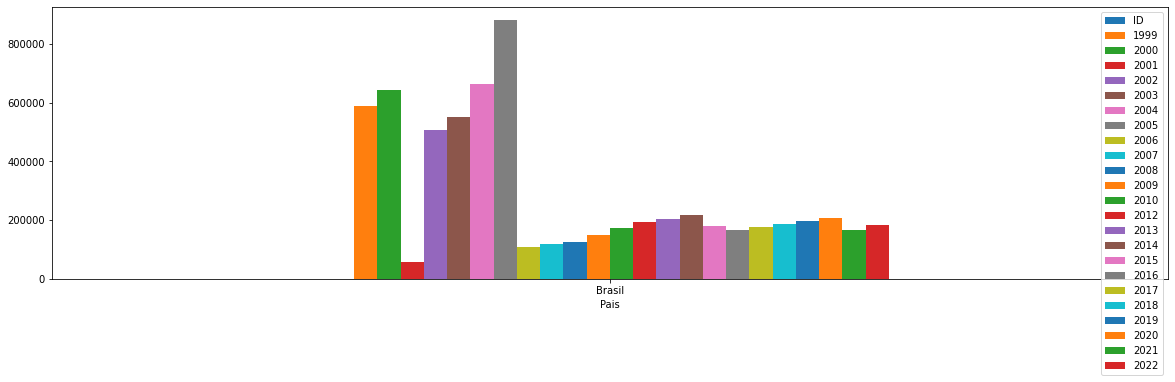

In [ ]:
df1_PIB.plot(kind = 'bar', legend = True, figsize=(20,5), x = 'Pais', rot = 0)

##Carregamento

In [ ]:
#Exportando Arquivo
df1.to_csv('pib_tratado.csv',index=False) 

In [ ]:
df1=pd.read_csv('/content/pib_tratado.csv')

In [ ]:
df1

,ID,Pais,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,5,Argentina,283523.0,284204.0,268697.0,97732.0,127643.0,151958.0,181549.0,212702.0,247096.0,277912.0,301331.0,296109.0,315832.0,329332.0,347731.0,578705.0,578692.0,589585.0,602868.0,617386.0,633889.0,455172.0,483765.0
1,19,Bolivia,8298.0,8412.0,8154.0,7917.0,8102.0,8749.0,9358.0,10828.0,1191.0,13194.0,17549.0,18961.0,21809.0,23306.0,24925.0,33537.0,35231.0,38204.0,41429.0,44903.0,48626.0,38547.0,40895.0
2,22,Brasil,586922.0,644283.0,55441.0,505712.0,552239.0,663552.0,882043.0,106771.0,117771.0,125163.0,148155.0,172435.0,192429.0,203624.0,215568.0,179961.0,167290.0,175927.0,185468.0,195367.0,205441.0,164584.0,181061.0
3,124,Paraguai,7301.0,7095.0,6446.0,5091.0,5552.0,695.0,7473.0,8773.0,9206.0,9735.0,13611.0,14284.0,15939.0,17257.0,18788.0,29065.0,30094.0,31441.0,3284.0,34237.0,35722.0,36973.0,39197.0
4,172,Uruguai,20913.0,20086.0,18561.0,12089.0,11211.0,13268.0,16878.0,19221.0,20725.0,22211.0,31606.0,33864.0,47355.0,54388.0,63167.0,54968.0,57151.0,59943.0,63134.0,66532.0,70107.0,60108.0,63741.0
5,175,Venezuela,97977.0,117153.0,122872.0,92889.0,83442.0,1128.0,143443.0,181608.0,219372.0,231959.0,353469.0,37916.0,394106.0,403123.0,409562.0,131855.0,133534.0,144227.0,155096.0,17041.0,184364.0,44893.0,43546.0
